<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week1/Regression_Infrared_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tugas Week 1 Deep Learning 🚀🚀**

##**Model PyTorch dan TensorFlow untuk Dataset Infrared.csv 🍿**

In [28]:
from google.colab import files
uploaded = files.upload()


Saving Infrared.csv to Infrared (1).csv


##**Install dan import Library🔖**

In [29]:
# Install PyTorch & TensorFlow jika belum ada
!pip install torch torchvision torchaudio tensorflow scikit-learn numpy pandas matplotlib


##**Load & PreProcessing Dataset🔎**

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
# Load dataset
df = pd.read_csv("Infrared.csv")

# Cek data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [31]:
pd.set_option('display.max_columns', None)
print(df.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  aveAllL13_1    T_RC1  \
0     0.7025    35.0300    35.3775      34.4000      34.9175  34.9850   
1     0.7800    34.5500    34.5200      33.9300      34.2250  34.7100   
2     0.8625    35.6525    35.5175      34.2775      34.8000  35.6850   
3     0.9300    35.2225    35.6125      34.3850      35.2475  35.2075   
4     0.8950    35.5450    35.6650      34.9100      35.3675  35.6025   

   T_RC_Dry1  T_RC_Wet1  T_RC_Max1    T_LC1  T_LC_Dry1  T_LC_Wet1  T_LC_Max1  \
0    34.9850    34.7625    35.0325  

In [32]:
# Isi nilai yang hilang
df['Distance'] = df['Distance'].fillna(df['Distance'].median())



In [33]:
# Mengisi nilai NaN pada kolom numerik dengan median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Mengisi nilai NaN pada kolom kategorikal dengan modus (nilai terbanyak)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [34]:
from scipy.stats import zscore

# Hitung Z-Score untuk semua fitur numerik
z_scores = np.abs(df.select_dtypes(include=['float64', 'int64']).apply(zscore))

# Hapus baris yang memiliki Z-Score > 3 (outlier)
df = df[(z_scores < 3).all(axis=1)]
print(f"Dataset setelah menghapus outlier: {df.shape}")


Dataset setelah menghapus outlier: (938, 34)


In [41]:
from sklearn.preprocessing import OneHotEncoder

# Identifikasi fitur kategorikal
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Pastikan fitur kategorikal tidak kosong sebelum encoding
if cat_features:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_encoded = encoder.fit_transform(X[cat_features])

    # Konversi hasil encoding ke DataFrame
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_features))

    # Gabungkan dengan fitur numerik
    X_numeric = X.drop(columns=cat_features)
    X = pd.concat([X_numeric, X_encoded_df], axis=1)


In [42]:
# Cek tipe data setelah encoding
print(X.dtypes)

# Pastikan tidak ada nilai string
assert all(X.dtypes != 'object'), "Masih ada fitur kategorikal yang belum dikonversi!"


T_atm                                          float64
Humidity                                       float64
Distance                                       float64
T_offset1                                      float64
Max1R13_1                                      float64
Max1L13_1                                      float64
aveAllR13_1                                    float64
aveAllL13_1                                    float64
T_RC1                                          float64
T_RC_Dry1                                      float64
T_RC_Wet1                                      float64
T_RC_Max1                                      float64
T_LC1                                          float64
T_LC_Dry1                                      float64
T_LC_Wet1                                      float64
T_LC_Max1                                      float64
RCC1                                           float64
LCC1                                           float64
canthiMax1

In [44]:
print(f"Jumlah sampel X: {X.shape[0]}")
print(f"Jumlah sampel y: {y.shape[0]}")


Jumlah sampel X: 1014
Jumlah sampel y: 938


In [45]:
# Gabungkan X dan y sementara untuk memastikan sinkronisasi
data = pd.concat([X, y], axis=1)

# Hapus baris yang mengandung NaN
data = data.dropna()

# Pisahkan kembali X dan y
X = data.drop(columns=['aveOralM'])  # Sesuaikan dengan nama target variabel
y = data['aveOralM']


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(rf_model, n_features_to_select=5)

X_selected = selector.fit_transform(X, y)

# Simpan nama fitur yang dipilih
selected_features = X.columns[selector.support_]
print(f"Fitur yang dipilih: {list(selected_features)}")

# Update DataFrame hanya dengan fitur terpilih
X = X[selected_features]


Fitur yang dipilih: ['aveAllR13_1', 'canthi4Max1', 'T_FH_Max1', 'T_Max1', 'T_OR_Max1']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
X_train_np, X_test_np = np.array(X_train), np.array(X_test)
y_train_np, y_test_np = np.array(y_train), np.array(y_test)


In [52]:
print(X_train_np.shape, X_test_np.shape)


(689, 5) (173, 5)


##**Model dengan PyTorch🍳**

In [53]:
# Konversi ke tensor PyTorch
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).view(-1, 1)


In [54]:
# Dataset dan DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [55]:
# Model PyTorch
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

# Inisialisasi model
model = RegressionModel(X_train_np.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [56]:
# Early Stopping
best_loss = float('inf')
patience = 10
counter = 0

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validasi
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={val_loss:.4f}")

    # Early stopping logic
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

Epoch 1: Train Loss=962.6344, Val Loss=292.3944
Epoch 2: Train Loss=213.0498, Val Loss=76.2208
Epoch 3: Train Loss=33.7128, Val Loss=12.4690
Epoch 4: Train Loss=6.8998, Val Loss=3.4652
Epoch 5: Train Loss=2.6320, Val Loss=1.6572
Epoch 6: Train Loss=1.6780, Val Loss=0.9227
Epoch 7: Train Loss=1.1136, Val Loss=0.6279
Epoch 8: Train Loss=0.7516, Val Loss=0.4564
Epoch 9: Train Loss=0.5395, Val Loss=0.3525
Epoch 10: Train Loss=0.4334, Val Loss=0.2966
Epoch 11: Train Loss=0.3666, Val Loss=0.3758
Epoch 12: Train Loss=0.3351, Val Loss=0.2621
Epoch 13: Train Loss=0.2918, Val Loss=0.2297
Epoch 14: Train Loss=0.2497, Val Loss=0.2190
Epoch 15: Train Loss=0.2383, Val Loss=0.1939
Epoch 16: Train Loss=0.2139, Val Loss=0.1788
Epoch 17: Train Loss=0.1996, Val Loss=0.1759
Epoch 18: Train Loss=0.1911, Val Loss=0.1854
Epoch 19: Train Loss=0.1873, Val Loss=0.1988
Epoch 20: Train Loss=0.1808, Val Loss=0.2418
Epoch 21: Train Loss=0.1632, Val Loss=0.1456
Epoch 22: Train Loss=0.1468, Val Loss=0.1314
Epoch 23: 

In [57]:
# Evaluasi model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor).numpy()

mse = mean_squared_error(y_test_np, y_pred_tensor)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_tensor)

print("PyTorch Model Performance:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

PyTorch Model Performance:
MSE: 0.0982, RMSE: 0.3134, R²: 0.3011


##**Model dengan Tensorflow🥨**

In [58]:
# Model TensorFlow
model_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

model_tf.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
history = model_tf.fit(X_train_np, y_train_np, epochs=100, batch_size=32,
                        validation_data=(X_test_np, y_test_np), callbacks=[early_stopping], verbose=1)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1372.4159 - val_loss: 1313.5374
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1299.5732 - val_loss: 1227.8523
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1199.4122 - val_loss: 1081.6189
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1037.1182 - val_loss: 855.9633
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 814.5844 - val_loss: 588.6417
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 528.3213 - val_loss: 386.8709
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 363.0956 - val_loss: 308.0890
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 296.2513 - val_loss: 266.6820
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 259.5645 - val_loss: 226.7656
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 219.7469 - val_loss: 186.0436
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 183.1324 - val_loss: 146.0355
Epoch 12

In [60]:
# Evaluasi
y_pred_tf = model_tf.predict(X_test_np).flatten()

mse_tf = mean_squared_error(y_test_np, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test_np, y_pred_tf)

print("TensorFlow Model Performance:")
print(f"MSE: {mse_tf:.4f}, RMSE: {rmse_tf:.4f}, R²: {r2_tf:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
TensorFlow Model Performance:
MSE: 0.2343, RMSE: 0.4841, R²: -0.6673


##**Visualisasi📊**

📊 TensorFlow Model Visualization


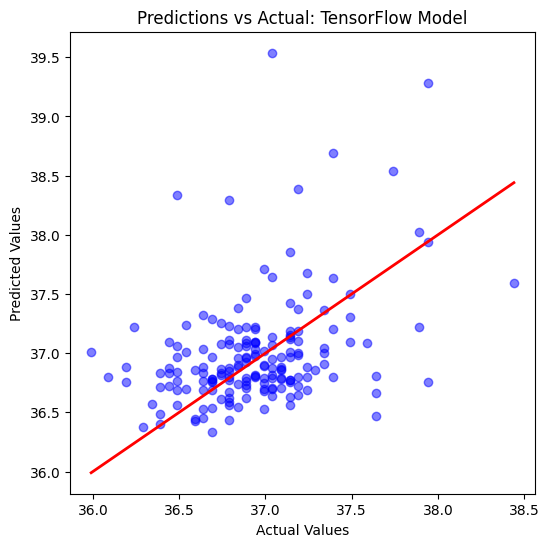

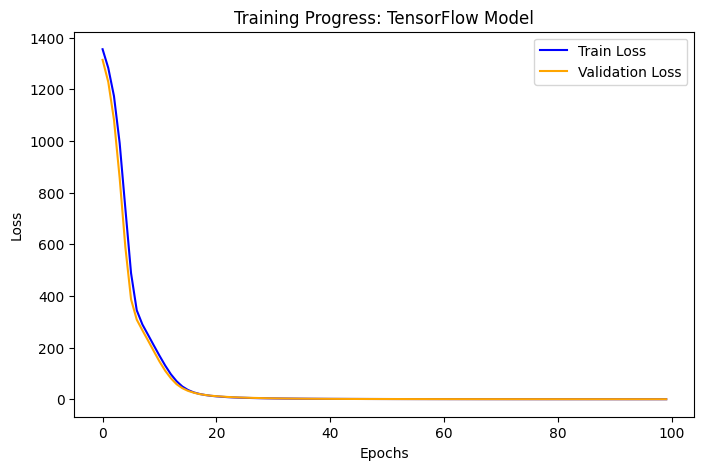

📊 PyTorch Model Visualization


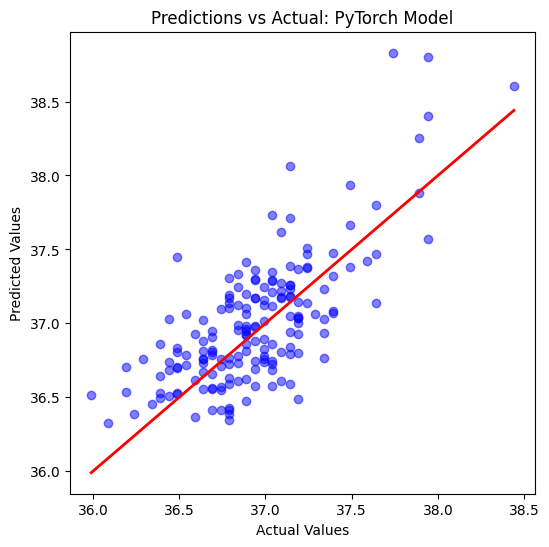

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# --- 1️⃣ Scatter Plot: Prediksi vs Aktual ---
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r', lw=2)  # Garis diagonal ideal
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predictions vs Actual: {title}")
    plt.show()

# --- 2️⃣ Learning Curve: Loss vs Epoch (TensorFlow) ---
def plot_learning_curve(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training Progress: {title}")
    plt.show()

# --- 🚀 Visualisasi Model TensorFlow ---
print("📊 TensorFlow Model Visualization")
plot_predictions(y_test_np, y_pred_tf, "TensorFlow Model")

if 'history' in locals():  # Cek jika training history ada
    plot_learning_curve(history, "TensorFlow Model")

# --- 🚀 Visualisasi Model PyTorch ---
print("📊 PyTorch Model Visualization")
model.eval()  # Set model ke evaluation mode

with torch.no_grad():
    y_pred_pytorch = model(torch.tensor(X_test_np, dtype=torch.float32)).numpy()

plot_predictions(y_test_np, y_pred_pytorch, "PyTorch Model")


##**Penjelasan SIngkat Mengenai Evaluasi Model**

1️⃣ MSE (Mean Squared Error) – Seberapa Besar Errornya?

MSE menghitung rata-rata dari selisih kuadrat antara nilai aktual dan prediksi.

🔹 Semakin kecil MSE, semakin baik modelnya.

🔹 Satuan error dalam kuadrat, jadi sulit diinterpretasikan langsung.

Formula:

*MSE* = *1/n ∑(y actual - y pred)²*

2️⃣ RMSE (Root Mean Squared Error) – Error dalam Satuan Asli

RMSE adalah akar dari MSE, sehingga mengembalikan error dalam satuan asli dari data.

🔹 Lebih mudah diinterpretasikan dibanding MSE.

🔹 Semakin kecil RMSE, semakin baik modelnya.

Formula:

*RMSE* = *√MSE*

3️⃣ R² (Koefisien Determinasi)
Seberapa Baik Modelnya?

R² mengukur seberapa baik model menjelaskan variabilitas data.

🔹 R² = 1 → Model sempurna (Prediksi 100% akurat).

🔹 R² = 0 → Model sama buruknya dengan rata-rata data.

🔹 R² < 0 → Model lebih buruk dari tebakan rata-rata.

Formula:

*R² =  1 - ∑(y actual - y pred)²/ ∑(y actual - y mean)²*

# ⚠️ Kesimpulan:
✅ PyTorch lebih baik daripada TensorFlow dalam performa saat ini.